# TASK 3

the picked angle is 284.40000000000003 degrees and 4.963716392671874 radians
a = 0.249 b = -0.969
a^2 = 0.062 b^2 = 0.938 ; the sum is 1.00000000000000
Matrix([[0.2486898872], [-0.9685831611], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])


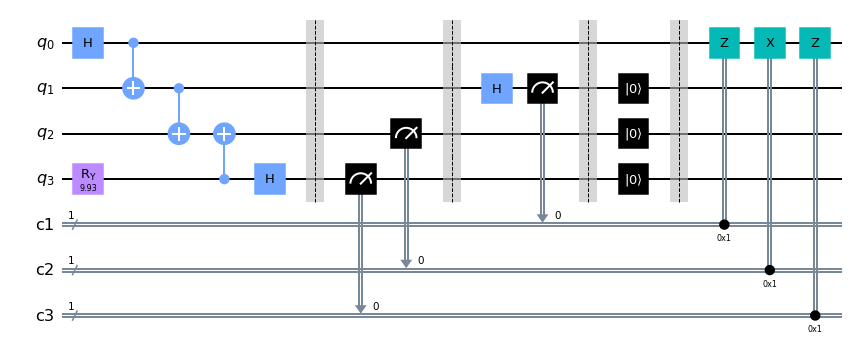

In [39]:
%run Matrices.ipynb
%matplotlib inline

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from numpy import pi, sqrt, matrix
from random import randrange

# remark the coincise representation of a quantum circuit
q =  QuantumRegister(4,"q") # quantum register with 4 qubits
c1 = ClassicalRegister(1,"c1") # classical register with 1 bit
c2 = ClassicalRegister(1,"c2") # classical register with 1 bit
c3 = ClassicalRegister(1,"c3") # classical register with 1 bit
c4 = ClassicalRegister(1,"c4") # classical register with 1 bit
qc = QuantumCircuit(q,c1,c2,c3) # quantum circuit with quantum and classical registers
    
# generating a random angle for rotation matrix
#r = 270 / 3.6      90 / 3.6
#r = randrange(100)
r = 284.40000000000003 / 3.6
theta = 2 * pi * (r / 100) # radians
print("the picked angle is", r * 3.6, "degrees and", theta, "radians")
a = cos(theta)
b = sin(theta)
print("a =", round(a, 3),"b =", round(b, 3))
print("a^2 =", round(a ** 2, 3),"b^2 =", round(b ** 2, 3), "; the sum is", round(a ** 2 + b ** 2, 3))

# setting q[3] (teleported qubit) to a random state
qc.ry(2 * theta, q[3])  
    
# creating an entanglement between q[2], q[1] and q[0]
qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[1], q[2])

# CNOT operator by Alice on her qubits where q[2] is the control qubit
qc.cx(q[3], q[2])

# Hadamard operator by Alice on q[3]
qc.h(q[3])
qc.barrier()

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
Alice_quantum_state = np.array(job.result().get_statevector(qc))
Alice_quantum_state = np.round(Alice_quantum_state, decimals=5)

# measurement done by Alice
qc.measure(q[3], c3)
qc.measure(q[2], c2)
qc.barrier()

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts_Alice = job.result().get_counts(qc)

# Hadamard operator by Bob on q[1]
qc.h(q[1])

# measurement done by Bob
qc.measure(q[1], c1)
qc.barrier()

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts_Bob = job.result().get_counts(qc)

# reset of qubits
qc.reset(q[1])
qc.reset(q[2])
qc.reset(q[3])
qc.barrier()

# post-processing done by Charlie
qc.z(q[0]).c_if(c1, 1)
qc.x(q[0]).c_if(c2, 1)
qc.z(q[0]).c_if(c3, 1)

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state = np.array(job.result().get_statevector(qc))
current_quantum_state = np.round(current_quantum_state, decimals=15)
print(Matrix(current_quantum_state.real).evalf(10))

# drawing circuit
qc.draw(output='mpl',reverse_bits=False)

In [40]:
print(Matrix(Alice_quantum_state.real).evalf(10))
#Matrix(Alice_quantum_state.real).evalf(10)

Matrix([[0.1243400000], [0], [0], [-0.4842900000], [-0.4842900000], [0], [0], [0.1243400000], [0.1243400000], [0], [0], [0.4842900000], [0.4842900000], [0], [0], [0.1243400000]])


In [41]:
Statevector(Alice_quantum_state).draw(output='latex')

<IPython.core.display.Latex object>

## Possible outcomes after measurement done by Alice

results:  {'1 0 0': 273, '0 1 0': 252, '0 0 0': 249, '1 1 0': 250}


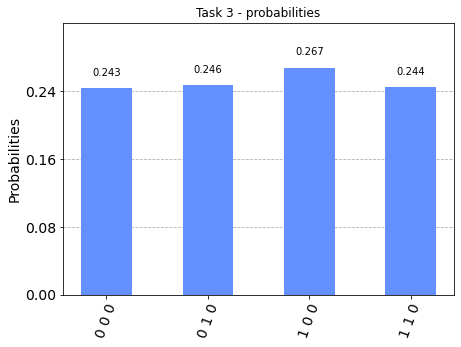

In [42]:
print("results: ", counts_Alice)
plot_histogram(counts_Alice, title="Task 3 - probabilities")

## Possible outcomes after measurement done by Bob

results:  {'1 0 0': 133, '1 1 0': 132, '0 0 1': 125, '0 0 0': 125, '0 1 0': 148, '1 0 1': 110, '0 1 1': 120, '1 1 1': 131}


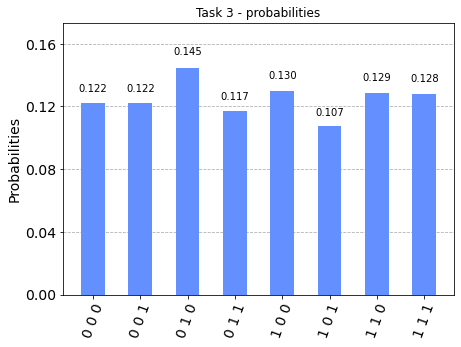

In [43]:
print("results: ", counts_Bob)
plot_histogram(counts_Bob, title="Task 3 - probabilities")

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$

<b>Measurement outcome 000:</b> The state of Charlie's qubit is $ a\ket{0}+b\ket{1} $. <br>
Charlie does not need to apply any extra gate.

<b>Measurement outcome 001:</b> The state of Charlie's qubit is $ a\ket{0}-b\ket{1} $. <br>
Charlie has to applies <u>Z gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome 010:</b> The state of Charlie's qubit is $ b\ket{0}+a\ket{1} $. <br>
Charlie has to applies <u>NOT gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome 011:</b> The state of Charlie's qubit is $ b\ket{0}-a\ket{1} $. <br>
Charlie has to applies <u>Z gate</u> and <u>NOT gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome 100:</b> The state of Charlie's qubit is $ a\ket{0}-b\ket{1} $. <br>
Charlie has to applies <u>Z gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome 101:</b> The state of Charlie's qubit is $ a\ket{0}+b\ket{1} $. <br>
Charlie will apply <u>Z gate twice</u>, so the state remains: $ a\ket{0}+b\ket{1} $, but also he does not need to apply any extra gate.

<b>Measurement outcome 110:</b> The state of Charlie's qubit is $ -b\ket{0}+a\ket{1} $. <br>
Charlie has to applies <u>NOT gate</u> and <u>Z gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome 111:</b> The state of Charlie's qubit is $ -b\ket{0}-a\ket{1} $. <br>
Charlie has to applies <u>Z gate</u>, <u>NOT gate</u> and <u>Z gate</u>, so the state becomes: $ a\ket{0}+b\ket{1} $. <br><br>

## Comparison of measured and computed (original) state vector

In [44]:
Statevector(current_quantum_state).draw(output='latex')

<IPython.core.display.Latex object>

In [45]:
computed_quantum_state = np.array(TensorProduct(zero, zero, zero, Matrix([a, b])))
Statevector(computed_quantum_state).draw(output='latex')

<IPython.core.display.Latex object>

$\color{blue}{\text{Thus we see, that the quantum message has teleported via the classical channel.}}$